In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns


df = pd.read_csv("/content/SpotifyFeatures.csv")


df.head()
df.describe()


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


In [16]:
df.info()
df.isnull().sum()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

In [ ]:
# cleaning genre section and removing nulls (empty cells)
df=df[df['genre'].notnull()]
df = df[df['genre'].str.strip() !='']

#check top genres

df['genre'].value_counts().head(10)

/tmp/ipython-input-58-4278438918.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['genre'].isin(top_genres)],x='genre', y ='danceability',palette='cool')


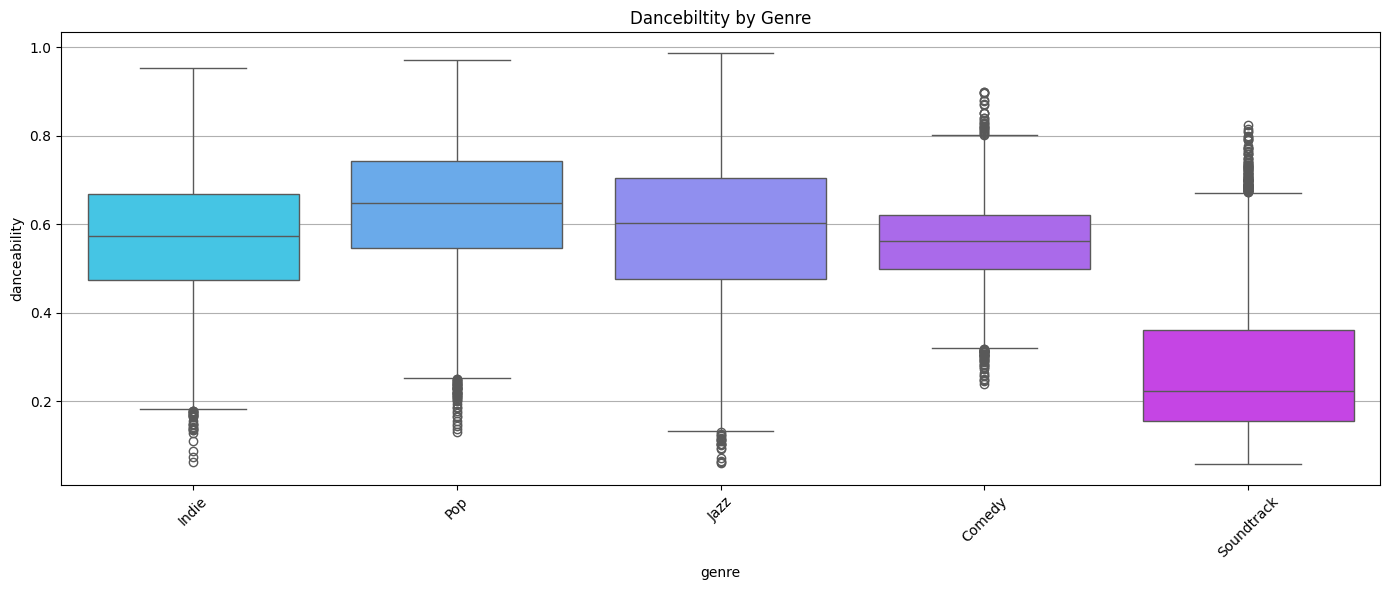

In [58]:
#Danceability by Genre

plt.figure(figsize=(14,6))

top_genres = df['genre'].value_counts().head().index
sns.boxplot(data=df[df['genre'].isin(top_genres)],x='genre', y ='danceability',palette='cool')
plt.xticks(rotation=45)
plt.grid(True,axis='y')
plt.title('Dancebiltity by Genre')
plt.tight_layout()
plt.show()

/tmp/ipython-input-102-3454099760.py:5: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


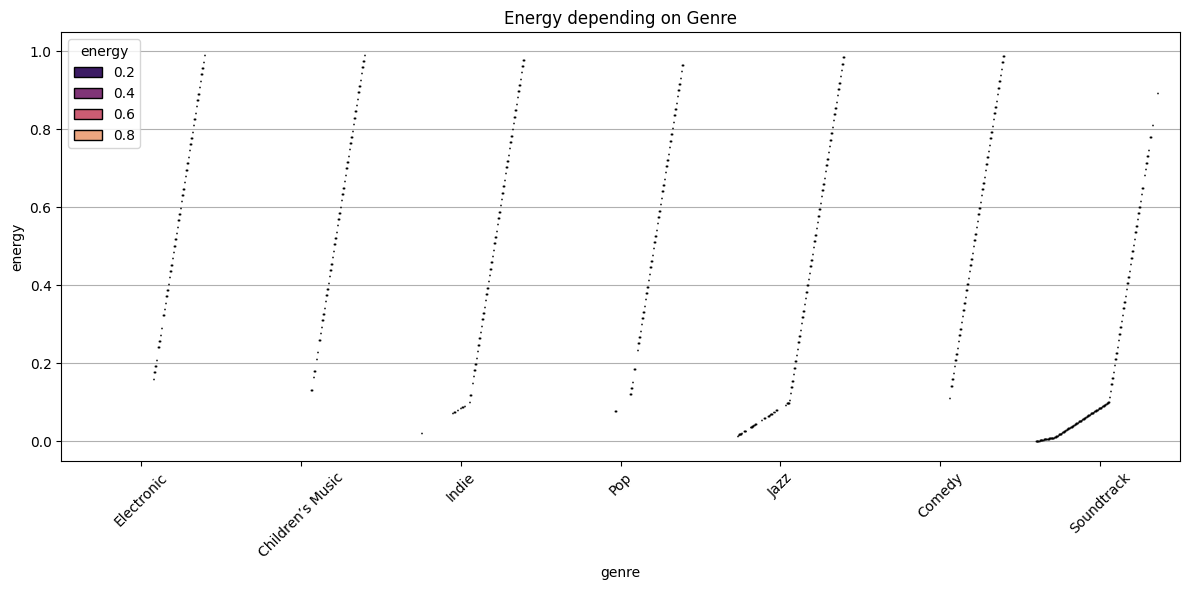

In [102]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[df['genre'].isin(top_genres)],x='genre',y='energy',hue='energy',palette='magma')
plt.xticks(rotation=45)
plt.title('Energy depending on Genre')
plt.tight_layout()
plt.grid(True,axis='y')
plt.show()

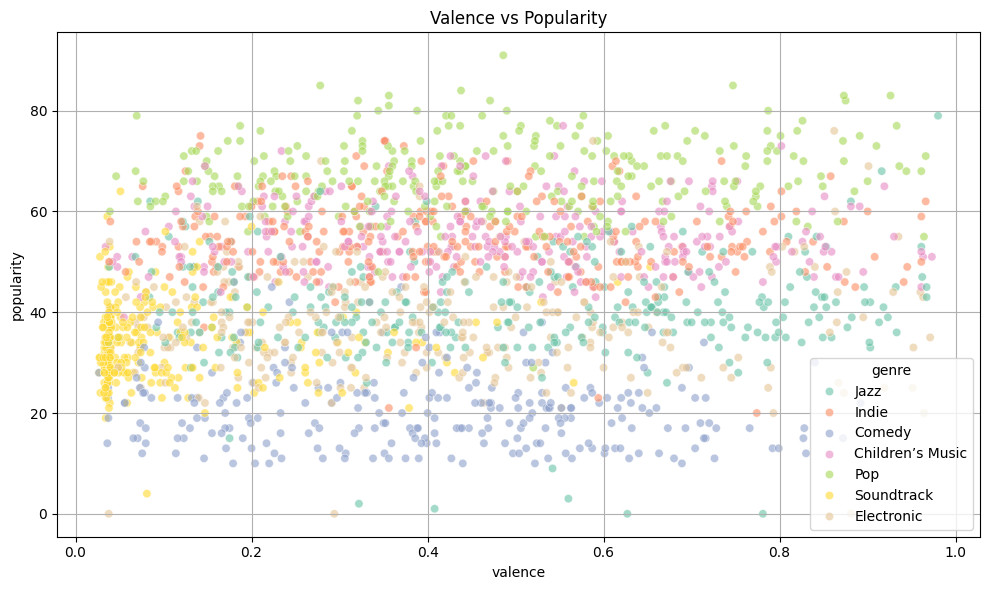

In [85]:
#filtered just top 7 genres (Comedy, Soundtrack, Indie, Jazz, Pop, Electronic, Children’s Music )
top_genres = df['genre'].value_counts().head(7).index
df_filtered = df[df['genre'].isin(top_genres)]


plt.figure(figsize=(10,6))

sns.scatterplot(data=df_filtered.sample(2000),x = 'valence', y = 'popularity',alpha = 0.6, hue= 'genre', palette='Set2',legend=True)
plt.title('Valence vs Popularity')
plt.xlabel('valence')
plt.ylabel('popularity')
plt.grid(True)
plt.tight_layout()
plt.show()

Stared at scatterplot for 5 minutes and saw nothing but chaos, so I barplotted itinstead, yes scatterplot was messy af ☹

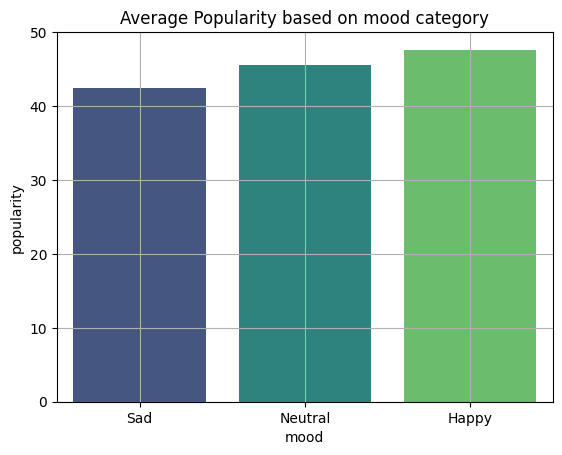

In [92]:
# Create mood categories from valence
df_filtered = df_filtered.copy()
df_filtered.loc[:,'mood']= pd.cut(df_filtered['valence'],bins=[0,0.4,0.7,1.0],labels= ['Sad','Neutral','Happy'])

#Average popularity per mood
mood_popularity= df_filtered.groupby('mood',observed = True)['popularity'].mean().reset_index()


#plot

sns.barplot(data=mood_popularity,x='mood',y='popularity',hue='mood',palette='viridis')
plt.title('Average Popularity based on mood category')
plt.grid(True)
plt.show()

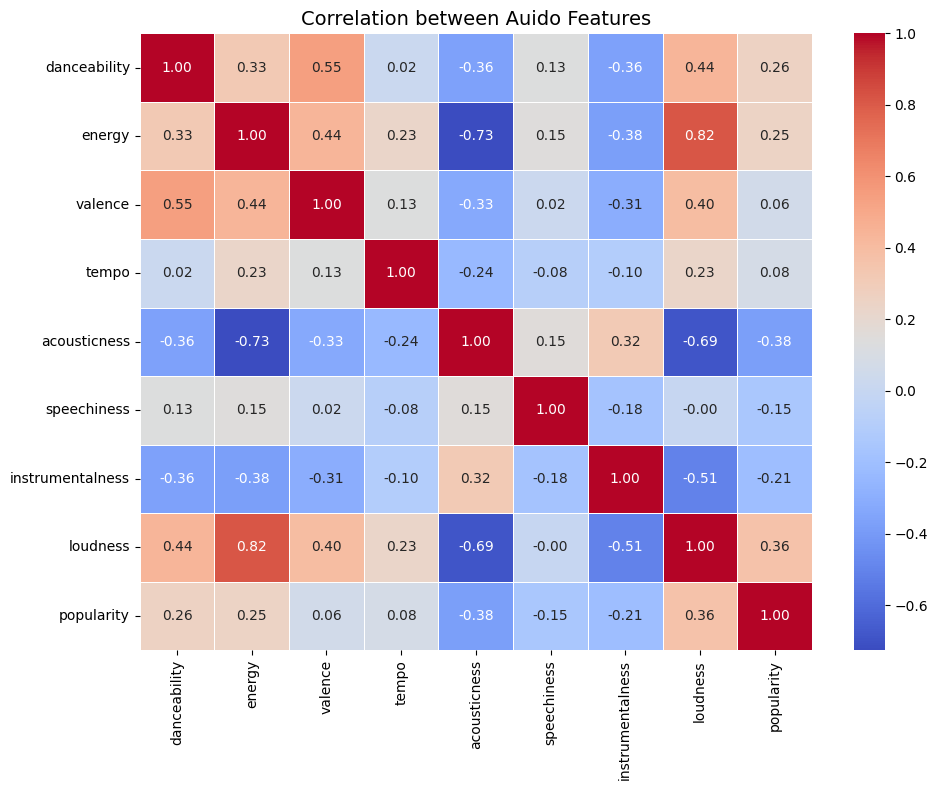

In [97]:
num_cols = ['danceability','energy','valence','tempo','acousticness','speechiness','instrumentalness','loudness','popularity']

plt.figure(figsize=(10,8))
corr=df[num_cols].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm',linewidth=0.5,fmt='.2f')
plt.title('Correlation between Auido Features',fontsize=14)
plt.tight_layout()
plt.show()

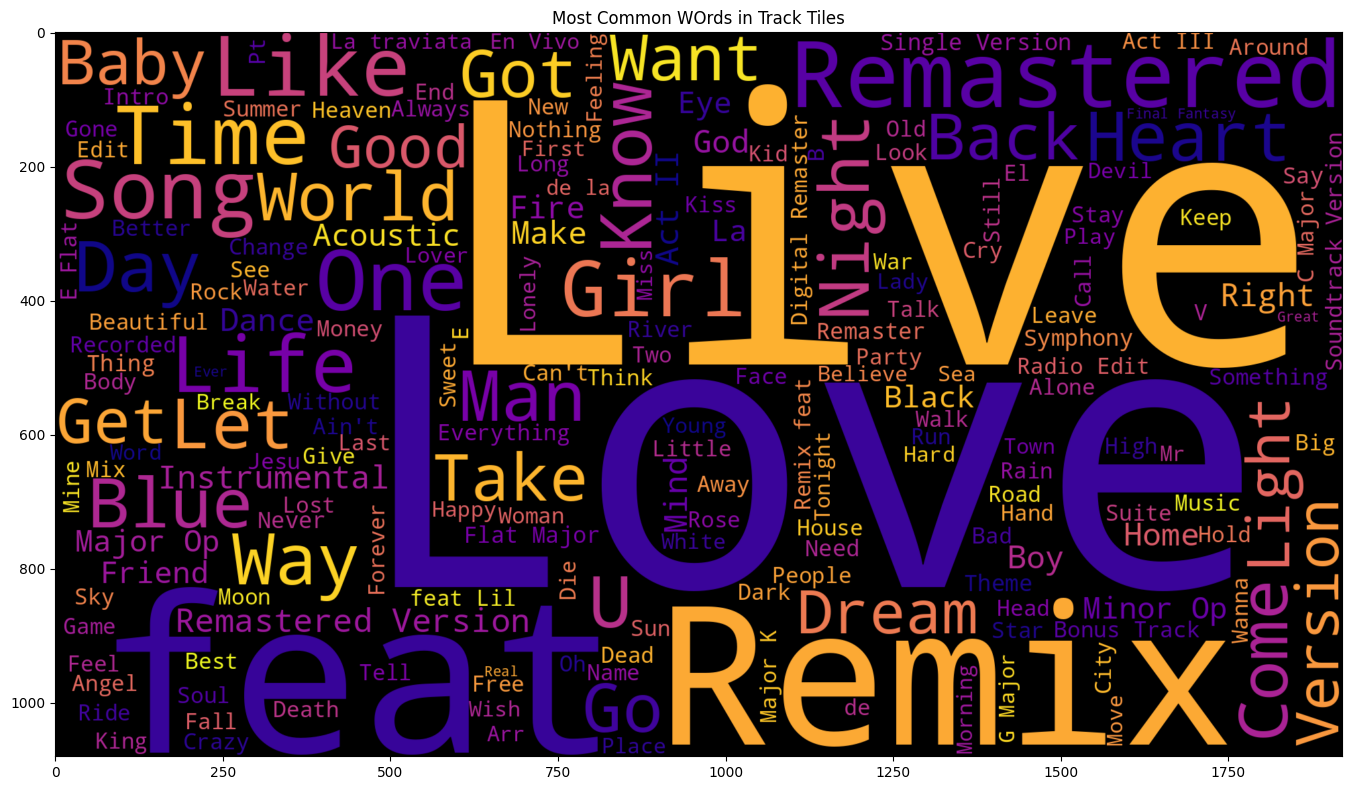

In [139]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
import string


track_words = ' '.join(df['track_name'].dropna().astype(str).values)

#Optional: Remove common words

stop_words = set(stopwords.words('english'))
wordcloud = WordCloud(width=1920,height=1080,background_color='black',stopwords=stop_words,colormap='plasma').generate(track_words)


plt.figure(figsize=(18,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis=('off')
plt.title('Most Common WOrds in Track Tiles')
plt.tight_layout()
plt.show()

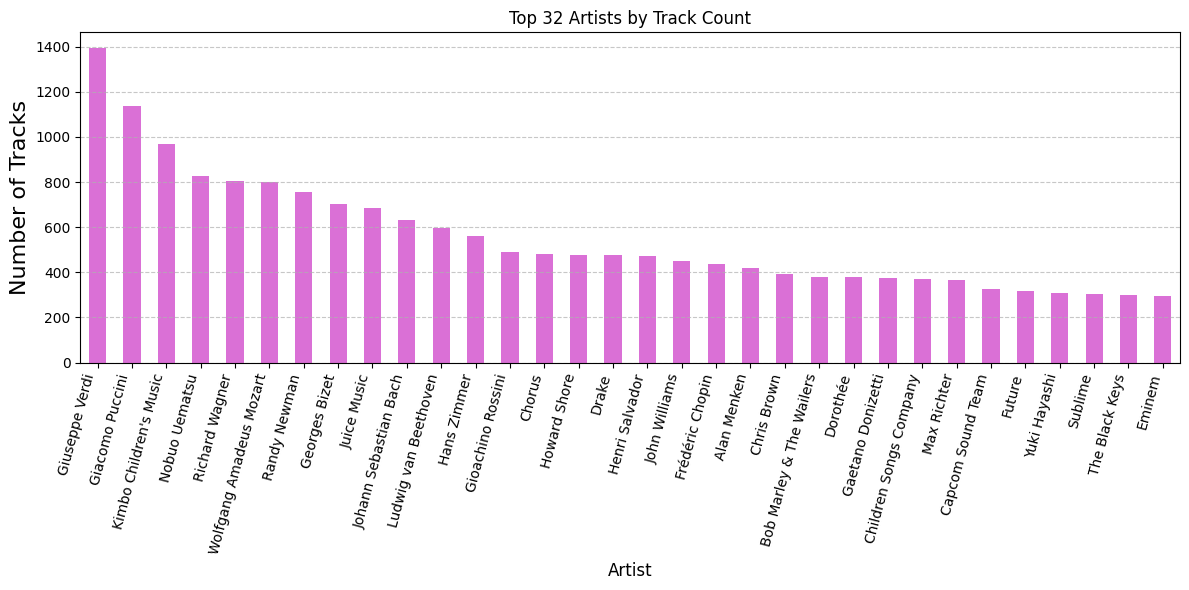

In [160]:
plt.figure(figsize=(12,6))
df['artist_name'].value_counts().head(32).plot(kind='bar',color='orchid')

plt.title('Top 32 Artists by Track Count')
plt.xticks(rotation=75,ha='right')

plt.xlabel('Artist',fontsize=12)
plt.ylabel('Number of Tracks',fontsize=16)
plt.grid(axis='y',linestyle='dashed',alpha=.7)
plt.tight_layout()
plt.show()


